In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Basic Exploratory Data Analysis

### Features against target

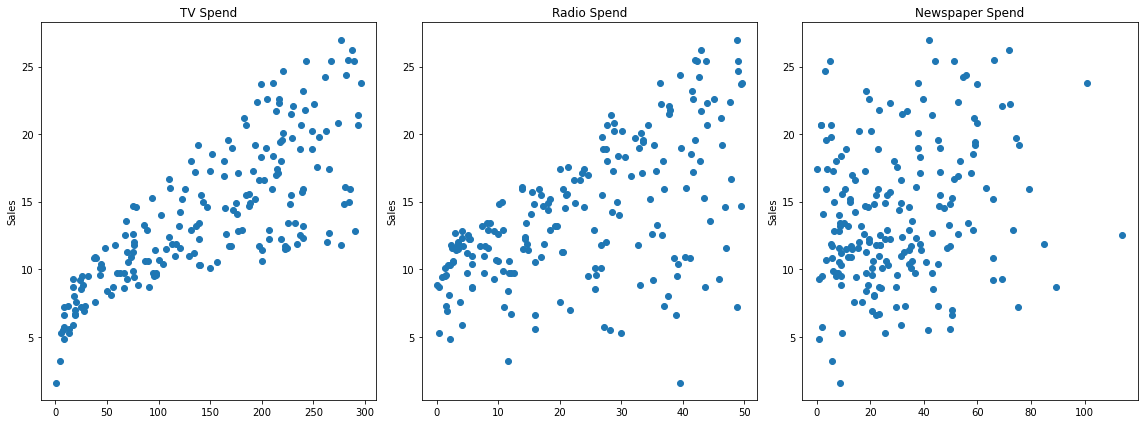

In [9]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_title('TV Spend')
axes[0].set_ylabel('Sales')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title('Radio Spend')
axes[1].set_ylabel('Sales')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title('Newspaper Spend')
axes[2].set_ylabel('Sales')
plt.tight_layout();

### featurs against features and target

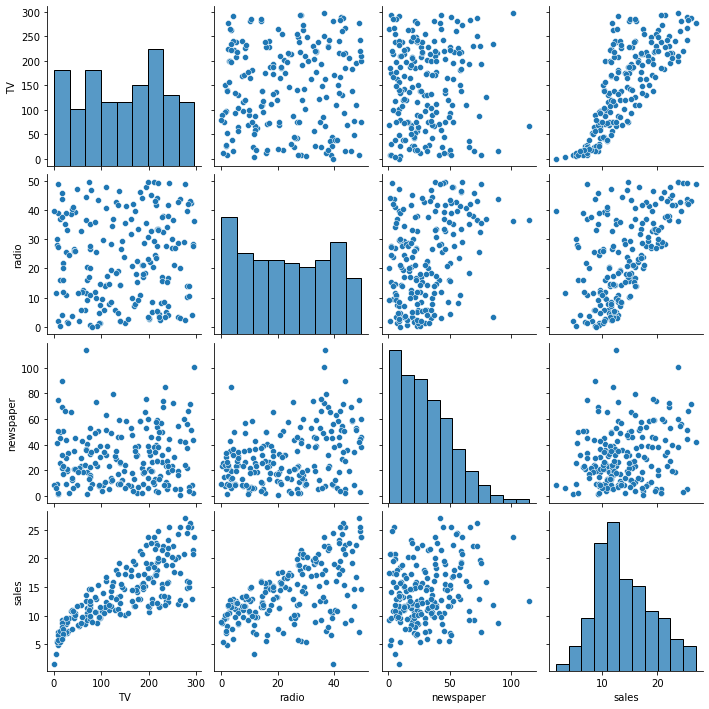

In [10]:
sns.pairplot(df)

## Sklearn linear models

### separating features from target

In [11]:
X = df.drop('sales',axis=1)

In [12]:
y = df['sales']

### splitting train set from test set

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
print(f'Lenght of data frame is: {len(df)}')
print(f'Lenght of X_train is: {len(X_train)}')
print(f'Lenght of y_train is: {len(y_train)}')
print(f'Lenght of X_test is: {len(X_test)}')
print(f'Lenght of y_test is: {len(y_test)}')

Lenght of data frame is: 200
Lenght of X_train is: 140
Lenght of y_train is: 140
Lenght of X_test is: 60
Lenght of y_test is: 60


### creating the model

In [24]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression() # using default hyperparameteres

### fitting the model to the train set

In [28]:
model.fit(X_train, y_train) # fiting the model to train data

LinearRegression()

### predicting target values 

In [48]:
test_predictions = model.predict(X_test) # predicting y values on X_test data

In [49]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

## Evaluating regression models

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Mean Absolute Error (MAE)

$$
\frac{1}{n}\sum_{i=1}^{n}|y_i-ŷ_i|
$$

In [45]:
mean_absolute_error(y_test,test_predictions)

1.213745773614481

### Mean Squared Error (MSE)


$$
\frac{1}{n}\sum_{i=1}^{n}(y_i-ŷ_i)^2
$$

In [46]:
mean_squared_error(y_test, test_predictions)

2.2987166978863782

### Root Mean Squared Error (RMSE)

$$
\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-ŷ_i)^2}
$$

In [47]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.516151937599388

_____

<AxesSubplot:xlabel='sales', ylabel='Count'>

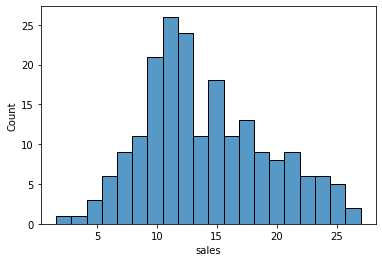

In [50]:
sns.histplot(data=df,x='sales',bins=20)

In [52]:
# Mean value of the sales 
df['sales'].mean()
# RMSE is a little bit over 10% when compared to the mean value of sales

14.022500000000003

## Residual plots

### calculating the residuals

In [53]:
test_residuals = y_test - test_predictions

### scatter plot of the residuals

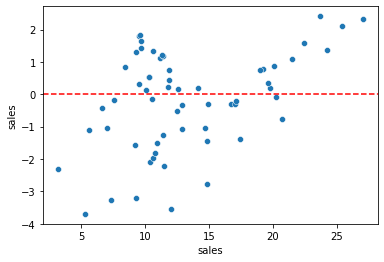

In [58]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

### distribution plot of the residuals

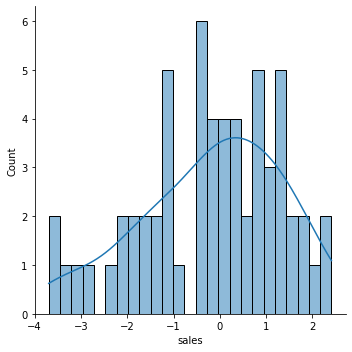

In [60]:
sns.displot(test_residuals,bins=25,kde=True)

### checking against a normal distribution plot

In [61]:
import scipy as sp

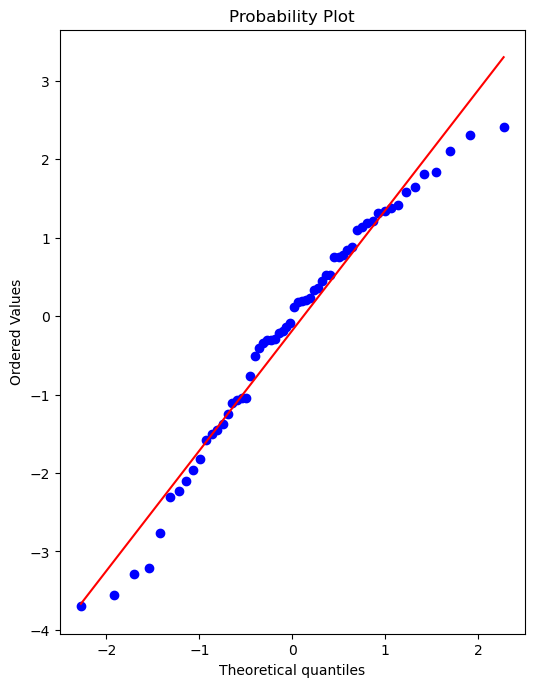

In [62]:
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_residuals,plot=ax)

## Simple model deployment

In [63]:
final_model = LinearRegression()

In [64]:
final_model.fit(X,y)

LinearRegression()

In [65]:
# coefficients

In [67]:
# this is the betas coefficients
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

### saving the final model

In [69]:
from joblib import dump,load

In [70]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

### loading the model

In [71]:
loaded_model = load('final_sales_model.joblib')

In [73]:
X.shape

(200, 3)

### using the model on new data

In [74]:
# 149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149,22,12]]

In [75]:
loaded_model.predict(campaign)

array([13.893032])